In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#EDA..

{'whiskers': [<matplotlib.lines.Line2D at 0x1e40c1f25f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e40c1f2c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e40c1f2208>],
 'medians': [<matplotlib.lines.Line2D at 0x1e40c207358>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e40c2076a0>],
 'means': []}

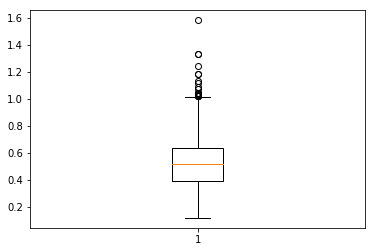

In [8]:
plt.boxplot(df['volatile acidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e40d2b08d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e40d2b0f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e40d2b04a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e40d2bb630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e40d2bb978>],
 'means': []}

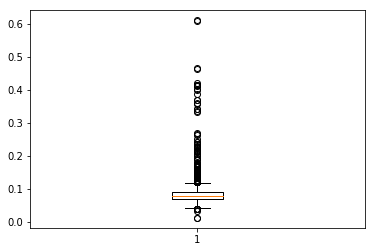

In [9]:
plt.boxplot(df['chlorides'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e40d310780>,
 'caps': [<matplotlib.lines.Line2D at 0x1e40d310e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e40d310358>],
 'medians': [<matplotlib.lines.Line2D at 0x1e40d31c4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e40d31c828>],
 'means': []}

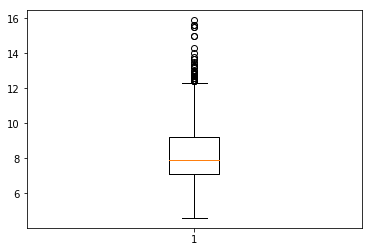

In [10]:
plt.boxplot(df['fixed acidity'])

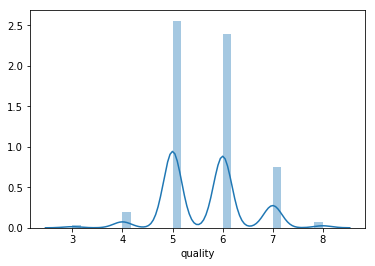

In [11]:
sns.distplot(df["quality"])

In [12]:
dfcorr = df.corr()

<Figure size 720x720 with 0 Axes>

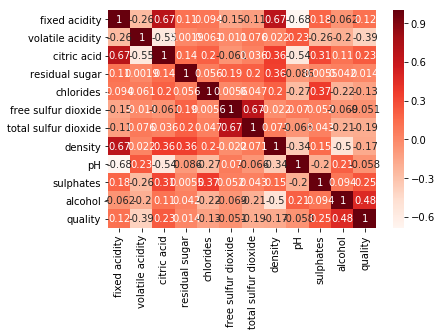

In [13]:
plt.figure(figsize=(10,10))
plt.show()
sns.heatmap(dfcorr, cmap='Reds', annot=True)

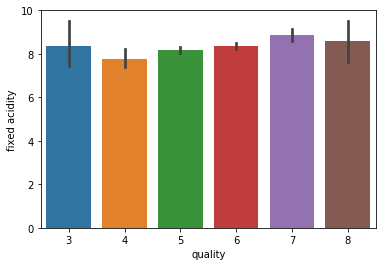

In [15]:
sns.barplot(df['quality'], df['fixed acidity'])
plt.show()

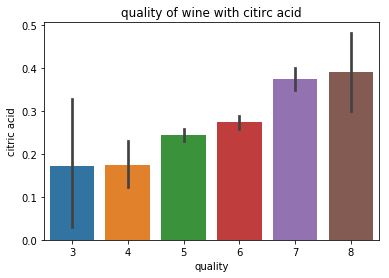

In [16]:
sns.barplot(df['quality'], df['citric acid'])
plt.title("quality of wine with citirc acid")
plt.show()

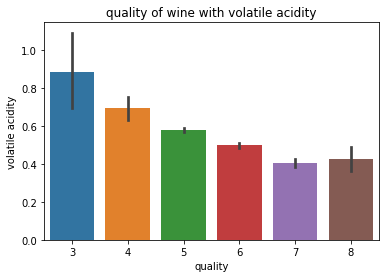

In [17]:
sns.barplot(df['quality'], df['volatile acidity'])
plt.title("quality of wine with volatile acidity")
plt.show()

In [18]:
# here we can see as the value of volatile acidity increases wine quality is decreases..

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

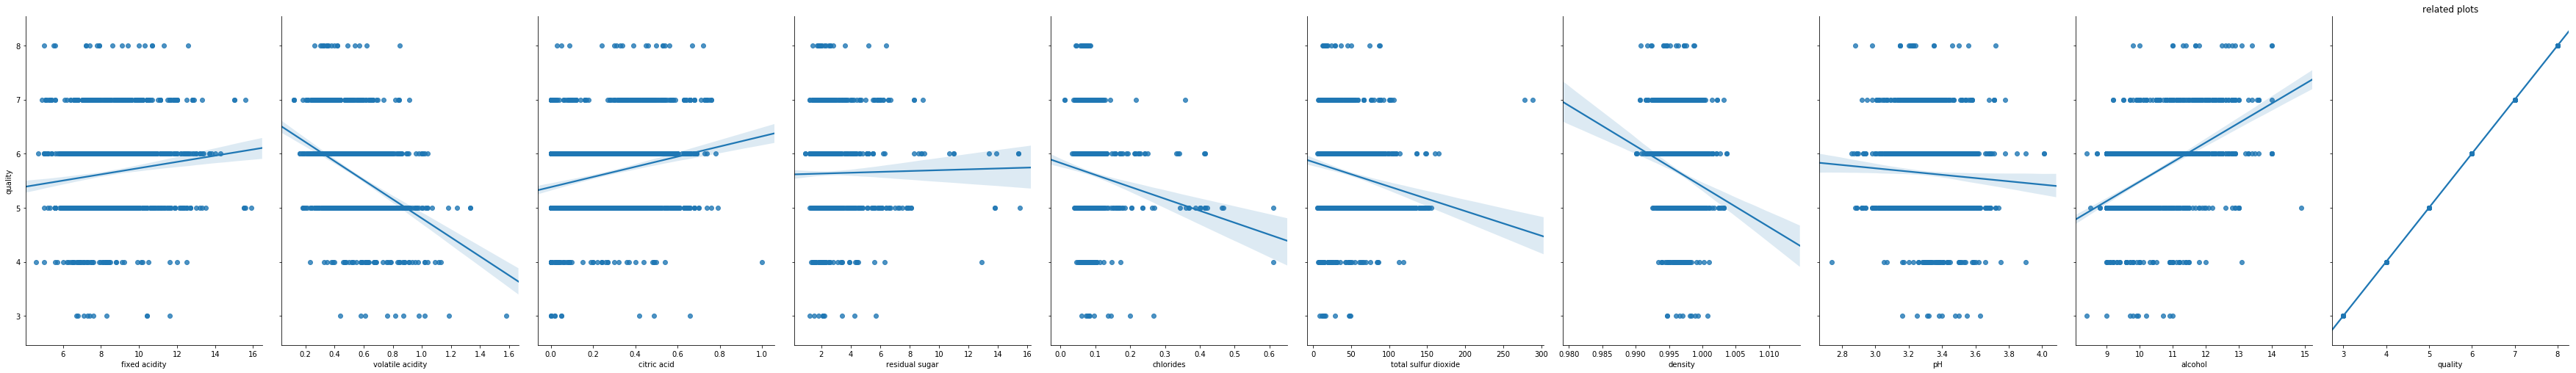

In [23]:
sns.pairplot(df, x_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides','total sulfur dioxide', 'density',
       'pH', 'alcohol', 'quality'], y_vars= 'quality', aspect= .7, height=7, kind='reg' )
plt.title('related plots')
plt.show()

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [26]:
threshhold = 3
df = df[(z<3).all(axis=1)]

In [27]:
df.shape

(1451, 12)

In [28]:
x = df.iloc[:, 0:-1].values
y= df.iloc[:,-1].values

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.33, random_state=45)

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

In [56]:
# declare hyperparameters to tune


In [57]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
gsv = GridSearchCV(pipeline, hyperparameters, cv=10)
gsv.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...ors=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print(gsv.refit)

True


In [61]:
pred = gsv.predict(x_test)
print(pred)


[5.2  5.87 5.57 5.29 5.71 6.52 6.78 5.18 6.27 6.86 5.75 6.67 5.33 5.23
 5.84 5.09 5.63 5.42 5.76 5.59 5.1  5.12 6.01 5.25 5.31 6.63 5.8  6.31
 6.9  6.17 5.46 5.35 5.71 5.06 6.61 6.49 5.78 5.26 6.34 5.19 5.48 5.22
 6.04 5.29 5.32 5.27 5.71 5.73 6.06 6.76 6.78 5.18 6.52 5.3  6.97 5.19
 5.6  5.81 6.6  5.19 6.54 5.07 5.49 5.39 5.63 5.38 5.96 6.37 5.93 5.83
 6.63 5.54 5.32 4.99 6.59 6.11 5.55 5.26 6.35 6.04 6.83 5.35 5.5  5.13
 5.87 6.2  6.41 5.87 5.39 5.39 5.36 5.48 6.23 7.08 5.14 5.88 5.13 5.72
 5.92 6.03 5.14 5.85 5.78 5.77 5.19 5.11 5.6  5.61 5.77 5.02 6.25 6.33
 5.07 5.65 5.4  5.07 5.03 6.43 5.19 6.42 5.11 5.92 5.06 5.27 5.04 5.55
 5.75 5.4  6.53 5.52 6.67 6.23 5.22 5.   5.29 5.1  6.05 5.27 5.47 5.71
 5.04 5.82 5.39 5.84 5.62 5.05 5.88 6.01 5.36 5.13 5.9  5.08 6.   5.05
 5.82 5.86 5.9  5.52 5.82 6.27 5.72 5.29 5.43 5.09 6.6  5.46 5.19 6.
 6.03 7.19 6.61 5.25 5.46 5.04 5.15 6.98 5.1  5.22 5.   5.13 5.17 5.22
 5.11 5.48 5.14 5.4  6.43 6.05 5.87 6.35 5.5  6.13 5.13 6.3  6.83 6.15
 6.08 5.

In [62]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.47945317448660774
0.33983319415448854


In [64]:
import pickle 
saved_model = pickle.dumps(gsv)
loadmodel= pickle.loads(saved_model)
loadmodel.predict(x_test)

array([5.2 , 5.87, 5.57, 5.29, 5.71, 6.52, 6.78, 5.18, 6.27, 6.86, 5.75,
       6.67, 5.33, 5.23, 5.84, 5.09, 5.63, 5.42, 5.76, 5.59, 5.1 , 5.12,
       6.01, 5.25, 5.31, 6.63, 5.8 , 6.31, 6.9 , 6.17, 5.46, 5.35, 5.71,
       5.06, 6.61, 6.49, 5.78, 5.26, 6.34, 5.19, 5.48, 5.22, 6.04, 5.29,
       5.32, 5.27, 5.71, 5.73, 6.06, 6.76, 6.78, 5.18, 6.52, 5.3 , 6.97,
       5.19, 5.6 , 5.81, 6.6 , 5.19, 6.54, 5.07, 5.49, 5.39, 5.63, 5.38,
       5.96, 6.37, 5.93, 5.83, 6.63, 5.54, 5.32, 4.99, 6.59, 6.11, 5.55,
       5.26, 6.35, 6.04, 6.83, 5.35, 5.5 , 5.13, 5.87, 6.2 , 6.41, 5.87,
       5.39, 5.39, 5.36, 5.48, 6.23, 7.08, 5.14, 5.88, 5.13, 5.72, 5.92,
       6.03, 5.14, 5.85, 5.78, 5.77, 5.19, 5.11, 5.6 , 5.61, 5.77, 5.02,
       6.25, 6.33, 5.07, 5.65, 5.4 , 5.07, 5.03, 6.43, 5.19, 6.42, 5.11,
       5.92, 5.06, 5.27, 5.04, 5.55, 5.75, 5.4 , 6.53, 5.52, 6.67, 6.23,
       5.22, 5.  , 5.29, 5.1 , 6.05, 5.27, 5.47, 5.71, 5.04, 5.82, 5.39,
       5.84, 5.62, 5.05, 5.88, 6.01, 5.36, 5.13, 5.